# Capstone Project - Car Price Prediction by Pranav Bansal

# Problem Statement :
Perform EDA and derive Insights from the CARDETAILS dataset using Various Data Analysis and Data Visualization libraries of Python such as Pandas, Matplotlib &Seaborn. Create and Deploy a ML Model Which can be accessed by all , using Streamlit and GitHub.

# About the Dataset :
The Dataset used in this is project is CARDETAILS dataset. I have taken this dataset from Kaggle. The data of this dataset is collected from 'Car Dekho'.
This dataset contains details about different cars. This data has 4340 rows and 8 features . Following details of cars are included in the dataset:
1.  Car name - Name of the car
2.  Year - Year of the car when it was bought
3.  Selling Price - Selling price of the car
4.  Kms driven - Kilometers driven by the car
5.  Fuel - Required fuel for the car
6.  Seller type - Seller type of the car
7.  Transmission - Transmission
8.  Owner - Number of previous owners of the vehicle

# Link for the Dataset :
https://www.kaggle.com/datasets/akshaydattatraykhare/car-details-dataset

## This File Contains Only Data Preprocessing and Data Cleaning and Machine Learning Algorithms.

# Data preparation

In [310]:
# Importing the libraries

import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# matplotlib.pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [311]:
# Loading the dataset
car = pd.read_csv('/content/CAR DETAILS.csv')
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [312]:
# showing the first 5 rows
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [313]:
# showing the last 5 rows
car.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


# Basic Understanding of the Dataset.

In [314]:
# showing dimension of the dataset
car.shape

(4340, 8)

Observation :

This Data have 4340 rows and 8 columns.

In [315]:
# showing columns
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [316]:
# checking the datatypes
car.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [317]:
# showing the information about the dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB



Observation :

From the above output we can see -
1. There are 4340 rows and 8 columns.
2. There are 3 numerical columns i.e.. Year, Selling Price, Kms Driven.
3. There are 5 categorical columns i.e.. Car Name, Fuel, Seller Type, Transmission, Owner.
4. There are no null values in the dataset.

In [318]:
# Extracting Numerical and Categorical columns
cat_cols = car.select_dtypes(include=['object'])
print(cat_cols.columns)
num_cols = car.select_dtypes(exclude=['O'])
print(num_cols.columns)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [319]:
# showing descriptive statistical analysis
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [320]:
# showing the infomaton about categorical columns
car.describe(include='O')

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


# Data Preprocessing and Data Cleaning

# Checking for Outliers

<Axes: >

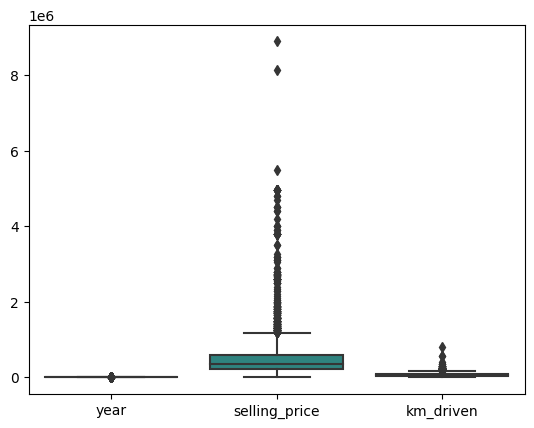

In [321]:
# Plotting BoxPlot for checking for outliers
sns.boxplot(car,palette='viridis')

From this Plot we can see that Selling_price column has so many outliers.So, we will remove these outliers.

<Axes: >

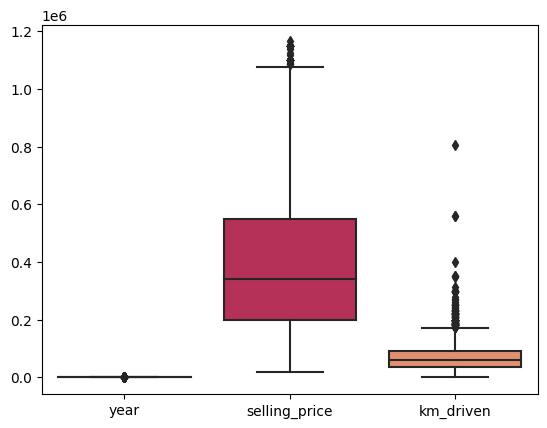

In [322]:
# Removing Outliers

column = car['selling_price']
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
car['selling_price'] = column[(column > lower_bound) & (column < upper_bound)]

sns.boxplot(car,palette='rocket')

 # Handling Duplicate Values

In [323]:
# checking for duplicate values
car.duplicated().sum()

766

In [324]:
# Dropping the duplicate values
car.drop_duplicates(inplace=True)
car.shape

(3574, 8)

Observation :

After dropping duplicate values there are only 3574 rows are left in the dataset
with 8 columns.

 # Handling Missing Values

In [325]:
# checking the null values
car.isnull().sum()

name               0
year               0
selling_price    186
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

Observation :

As there are there are very less no. of null values in the dataset so we will drop these null values.

In [326]:
# Dropping the null values
car.dropna(inplace=True)

# checking for null values
car['selling_price'].isnull().any()

False

# Checking for Unique values

In [327]:
# checking for unique values
car.nunique()

name             1381
year               27
selling_price     358
km_driven         732
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [328]:
# checking for unique values of  name column
car['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [329]:
# checking for unique values of  year column
car['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2013, 2018, 2011, 2010, 2009,
       2019, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [330]:
# checking for unique values of selling_price column
car['selling_price'].unique()

array([  60000.,  135000.,  600000.,  250000.,  450000.,  140000.,
        550000.,  240000.,  850000.,  365000.,  260000.,  585000.,
        390000.,  975000.,  930000.,  525000.,  900000.,  229999.,
        625000., 1050000.,  560000.,  290000.,  275000.,  411000.,
        150000.,  500000.,  100000.,  725000.,  401000.,  750000.,
        310000.,  665000.,  465000.,  160000.,  675000.,  300000.,
         70000.,  151000.,  280000.,  350000.,  570000.,  125000.,
        130000.,  925000.,  200000.,  248000.,   80000.,  650000.,
        495000.,  371000., 1025000.,  325000.,  210000., 1150000.,
        175000.,  628000.,  399000.,  315000.,  780000.,  434000.,
        690000.,  555000.,  120000.,  165000.,   95000.,  800000.,
        840000.,  490000.,  400000., 1000000.,  530000.,   40000.,
         75000.,  540000.,  700000.,  430000.,   65000.,  195000.,
        170000.,  225000.,   99000.,  620000.,  320000.,  810000.,
        282000.,   72000.,  640000.,  380000.,  434999.,  1900

In [331]:
# checking for unique values of km_driven column
car['km_driven'].unique()

array([ 70000,  50000, 100000,  46000, 141000, 125000,  25000,  60000,
        78000,  35000,  24000,  33000,   4500,  14500,  15000, 130400,
       119000,  40000,  74000,  64000, 120000,  79000,  80000,  18500,
        10200,  29000,  28000,  90000,  73300,  92000,  66764, 350000,
       230000,  31000,  39000, 166000, 110000,  54000,  63000,  76000,
        11958,  20000,   9000,  58000,  62200,  53000,  63500,  29173,
        30000,  87000,  16000,  79350,  81000,   3600,  14272,  49213,
        57000,   3240,   5000,  10000, 114000,  53772, 140000, 175000,
        36000, 155500,  23000,  22155,  78380, 150000,  80362,  55000,
         1136,  43000,   2650, 115962,  65000,  56000, 213000, 139000,
       160000, 163000,  32000,  52000,  11240,  66000,  49000,  26500,
        72000,  44000, 130000, 195000, 155000,   4000,  41000,  10832,
        14681,  51000, 200000,  19600,  46730,  21170, 212814,  88635,
       149674,   8000,  68000,  38000,  75000,  98000,  81925,  82080,
      

In [332]:
# checking for unique values of fuel column
car['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [333]:
# checking for unique values of seller_type column
car['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [334]:
# checking for unique values of transmission column
car['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [335]:
# checking for unique values of owner column
car['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

# Feature Engineering

In [336]:
# creating a brand column using the name of the car
car['brand'] = car['name'].apply(lambda x:x.split()[0])

In [337]:
# checking the unique values of the brand and showing the first 5 rows of brand column
print(car['brand'].nunique())
print(car['brand'].unique())
print(car['brand'].head())

22
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Skoda' 'Toyota'
 'Mercedes-Benz' 'Mahindra' 'Ford' 'Nissan' 'Renault' 'Fiat' 'Volkswagen'
 'Audi' 'Mitsubishi' 'Daewoo' 'Force' 'OpelCorsa' 'BMW' 'Ambassador']
0     Maruti
1     Maruti
2    Hyundai
3     Datsun
4      Honda
Name: brand, dtype: object


In [338]:
# Saving this updated dataset for visualization by converting into new csv file
car.to_csv('car_updated.csv')

# Visualizing Target Feature

It is clear that the target feature is 'selling_price' which is the price of the car.

In [339]:
car['selling_price']

0        60000.0
1       135000.0
2       600000.0
3       250000.0
4       450000.0
          ...   
4335    409999.0
4336    409999.0
4337    110000.0
4338    865000.0
4339    225000.0
Name: selling_price, Length: 3388, dtype: float64

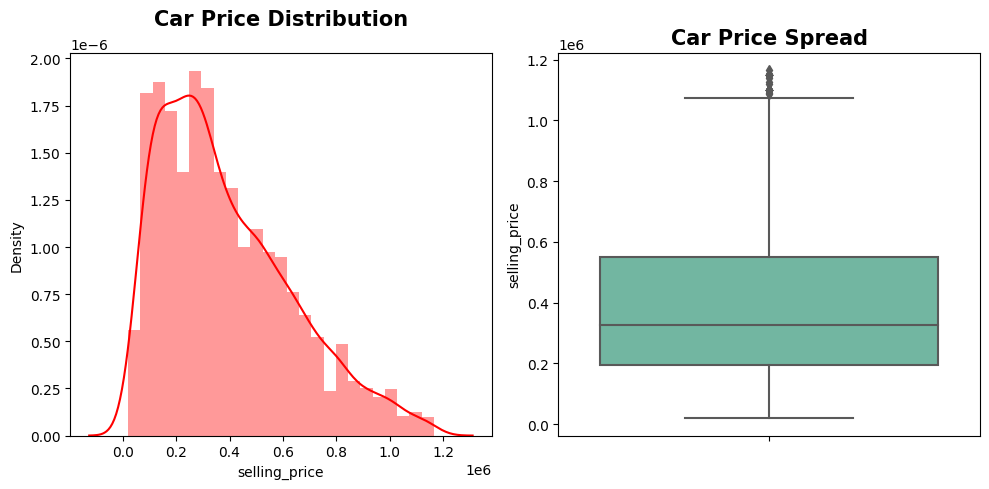

In [340]:
# Showing Car Price Distribution plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(car["selling_price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=15)

# Showing Car Price Spread plot
plt.subplot(1,2,2)
sns.boxplot(y=car["selling_price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",fontsize=15)
plt.tight_layout()
plt.show()

In [341]:
# Graphical Analysis of Car Price
car["selling_price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
selling_price,20000.0,387358.371901,325000.0,1165000.0,246786.158679,0.825563


Insights :

1. We can clearly observe that our Car Price Feature is Slightly Rightly Skewed Distribution.

2. We can clearly observe that there is a significant difference between mean & median value.

3. We can also make an insight that most of the car's price is below 3,25,000.

4. The Majority of the Car falls between 20,000  to  11,65,000.


# Conversion of Categorical Features to Numerical Features.

For this Conversion we will use Label Encoding for converting all the Categorical Features to numerical Features.

# Label Encoding

In [342]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['fuel','seller_type','transmission','owner']
for col in columns:
  car[col] = le.fit_transform(car[col])

car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000.0,70000,4,1,1,0,Maruti
1,Maruti Wagon R LXI Minor,2007,135000.0,50000,4,1,1,0,Maruti
2,Hyundai Verna 1.6 SX,2012,600000.0,100000,1,1,1,0,Hyundai
3,Datsun RediGO T Option,2017,250000.0,46000,4,1,1,0,Datsun
4,Honda Amaze VX i-DTEC,2014,450000.0,141000,1,1,1,2,Honda


# Selecting independent and the dependent features from the dataset

In [343]:
x = car.drop(['selling_price','name','brand'],axis=1) # x denotes independent features
y = car['selling_price']                              # y denotes dependent variable
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3388, 6)
(3388,)


# Train Test Split

Dividing the data into training and testing data

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
print(3388*0.25)

847.0


In [346]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2541, 6)
(847, 6)
(2541,)
(847,)


# Creating functions to evaluate the Regression Evaluation Metrics, Model Score.

In [347]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [348]:
def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)

def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Testing R2 Score



# Importing the ML Regression libraries

In [349]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor


# 1. Linear Regression

In [350]:
# Building the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

# Computing Training and Testing score
mscore(lin_reg)

# Generating Prediction
ypred_lr = lin_reg.predict(x_test)
print(ypred_lr)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_lr)

# Evaluating Model : R2 score
r2_lr = r2_score(y_test,ypred_lr)*100
r2_lr

Training Score 0.48143171753346437
Testing Score 0.562493731223056
[ -95954.51767431  304117.54108429  463388.54414328  481611.5788525
   96977.88869131   49012.83739578  393580.5140717   120256.61036696
  204188.30195371  441126.66399296  199458.61549956  119905.17571852
  401403.55797188  217154.83039685  397019.39337333   55731.16499333
  479931.99695311  262041.28701247   -5703.63421503  443174.09831494
  275741.33146055  218607.58254416  414078.40432853  239113.99998525
  162332.86443879  291184.39471956  398788.9513514    67576.48097613
  481063.41290992  630876.391934    363341.04879843  233812.06232575
  590391.47707447  388621.48387638  317729.14555363  452374.60502616
  471124.6925354   594086.55725311  153760.00566761  390726.95823434
  713278.19562357  322431.97487192  173082.18859487  486026.14240574
  406089.21208315  447173.15883076  215424.90411958  185847.01103021
  285219.58298789  299577.41226324  312778.64254256  642804.92063855
  369053.36064795  -76223.69394863  3

56.2493731223056

# 2. Ridge Regression

In [351]:
# Building the Ridge Regression Model
ridge = Ridge(alpha=10)
ridge.fit(x_train,y_train)

# Computing Training and Testing score
mscore(ridge)

# Generating Prediction
ypred_ridge = ridge.predict(x_test)
print(ypred_ridge)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_ridge)

# Evaluating Model : R2 score
r2_ridge = r2_score(y_test,ypred_ridge)*100
r2_ridge

Training Score 0.48129836442579976
Testing Score 0.5614928985578027
[ -95585.12994807  305256.19054745  464642.14009293  482873.3530434
   96986.78593675   49887.11990476  394719.33619221  120946.73216465
  204254.99076416  442312.55604881  200422.22877602  120899.65636654
  401551.25640666  217069.14860439  398296.25187022   56626.4915897
  481188.51012217  262971.8050882    -5115.24367791  443530.99842535
  275902.73349872  218793.74380547  415230.5024241   239058.93465842
  163231.1176239   292284.56105645  399106.65497541   68381.64649495
  481200.45253556  631437.29500434  364436.08101715  233918.58455318
  590876.49800975  389872.03726404  318859.50080226  452809.22675565
  471569.1434148   594583.15243647  154682.33613279  391019.40895348
  713656.80568682  323577.06098172  174014.1123198   486337.04678095
  407167.3828086   448377.99056526  215346.56687617  186818.9185212
  286011.42530096  299915.33779465  313766.22649515  631512.83736756
  369328.85267673  -75665.23793408  39

56.14928985578027

# 3. Lasso Regression

In [352]:
# Building the Lasso Regression Model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

# Computing Training and Testing score
mscore(lasso)

# Generating Prediction
ypred_lasso = lasso.predict(x_test)
print(ypred_lasso)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_lasso)

# Evaluating Model : R2 score
r2_lasso = r2_score(y_test,ypred_lasso)*100
r2_lasso

Training Score 0.4814317175292637
Testing Score 0.5624935012027064
[ -95954.45649461  304117.89965998  463389.39397325  481611.90882069
   96977.98990645   49013.17743824  393580.80982295  120256.76527843
  204187.84619234  441126.96823137  199458.91848007  119905.55426405
  401403.56328572  217154.79303201  397019.79242826   55731.51367345
  479932.32476189  262041.51893005   -5703.47336264  443173.71292411
  275741.45194025  218607.73485241  414078.70011249  239113.95457245
  162333.14600836  291184.21969752  398789.07850721   67576.74600329
  481062.97606777  630876.5343512   363341.33199234  233812.13529984
  590391.59376188  388621.87213422  317729.49530842  452374.77475521
  471124.3430803   594086.67869125  153760.30253634  390727.07502494
  713278.29117627  322432.33067307  173082.48398472  486026.20387545
  406088.95430461  447173.47084308  215424.85457118  185847.32283163
  285219.84342275  299577.61603104  312778.8870502   642802.8068323
  369053.47589424  -76223.5085189   3

56.249350120270634

# 4. Random Forest Regression

In [353]:
# Building the RandomForest Regression Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

# Computing Training and Testing score
mscore(rf)

# Generating Prediction
ypred_rf = rf.predict(x_test)
print(ypred_rf)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_rf)

# Evaluating Model : R2 score
r2_rf = r2_score(y_test,ypred_rf)*100
r2_rf

Training Score 0.818814957759766
Testing Score 0.5708266926882435
[ 74854.16666667 318781.57366667 541039.44322143 407877.73809524
 127692.85714286 108895.77380952 320258.73015873  92817.5
 235009.96       373753.86111111 249148.58946609 151976.54921429
 402512.32233333 166699.89       401554.72083333 151485.
 335456.81818182 194579.16666667  69998.33333333 312950.
 307149.97       196742.5        362538.11255411  79115.
 170272.81541667 259217.51904762 303498.20087121  84140.
 251446.40666667 925205.29761905 395587.06349206 284300.
 650464.01793615 259549.64285714 234733.33333333 405900.
 586930.         811236.31666232 106980.         283252.32142857
 544956.66666667 490150.         203419.16216667 470373.97574603
 316550.         470474.36246825 184649.92       183100.
 120687.5        187960.         324550.         583699.98
 278812.38095238  58635.19047619 295348.20087121 265445.57142857
  57329.52380952 418377.85507969 235349.97       322927.01128638
  76603.27333333 475028.5048

57.08266926882435

# 5. K-Nearest Neighbors Regression

In [354]:
# Building the KNeighbors Regression Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

# Computing Training and Testing score
mscore(knn)

# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_knn)

# Evaluating Model : R2 score
r2_knn = r2_score(y_test,ypred_knn)*100
r2_knn

Training Score 0.5337793275862783
Testing Score 0.3334163478073692
[ 74000.  211999.8 487000.  415000.  152000.   97000.  357800.  118000.
 449200.  333800.  274000.  258999.8 547999.8 327999.8 381999.8 141000.
 330000.  199000.   70500.  231000.  206000.  165000.  266000.   82000.
 180000.  324000.  250800.  358000.  145999.8 929000.  420200.  244000.
 639999.8 271000.  276799.8 367000.  377799.8 399000.   57000.  231000.
 864000.  302000.  390000.  409000.  450000.  602999.8  98200.  187000.
 161000.  185000.  281000.  516799.8 270000.  447000.  331000.  264000.
  70700.  563000.  295000.  324000.   81000.  454999.8 449200.  530000.
 510000.  399000.  720000.  519000.  410000.  542600.  527000.  344000.
 302000.  177999.6 257000.  225600.  264000.  542000.  390000.  422999.8
 510000.  403399.8 336000.  563600.  754200.  166999.8 365000.   88400.
 281000.  415000.  353000.  260000.  555400.  220000.  296000.  248000.
 166999.8 552000.  684000.  320000.  302999.8 776999.8 287000.  2070

33.34163478073692

# 6. Decision Tree Regression

In [355]:
# Building the DecisionTree Regression Model
dt = DecisionTreeRegressor(criterion='absolute_error')
dt.fit(x_train,y_train)

# Computing Training and Testing score
mscore(dt)

# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_dt)

# Evaluating Model : R2 score
r2_dt = r2_score(y_test,ypred_dt)*100
r2_dt

Training Score 0.8488479296964768
Testing Score 0.3970010444503469
[  60000.   350000.   315000.   430000.    75000.   135000.   270000.
   80000.    55000.   399500.   180000.   147499.5  300000.   175000.
  375000.   130000.   300000.   192500.    50000.   210000.   150000.
  100000.   245000.    55000.   150000.   235000.   185000.   100000.
  229999.   930000.   371000.   500000.   740000.   270000.   190000.
  300000.   750000.  1025000.    75000.   190000.   520000.   650000.
  220000.   404999.5  525000.   600000.   300000.   200000.   125000.
  195000.   317500.   500000.   320000.    63000.   185000.   250000.
   50000.   305000.   280000.   200000.   409999.   472499.5  420000.
  650000.   325000.   240000.   900000.   550000.   550000.   630000.
  900000.   370000.   240000.   202499.5  250000.   190000.   350000.
  409999.   350000.  1000000.   925000.    85000.   180000.   535000.
 1030000.   150000.   280000.   155000.   317500.   430000.   325000.
  220000.   281000.   1

39.70010444503469

# 7. Gradient Boosting Regression

In [356]:
# Building the DecisionTree Regression Model
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

# Computing Training and Testing score
mscore(gbr)

# Generating Prediction
ypred_gbr = gbr.predict(x_test)
print(ypred_gbr)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_gbr)

# Evaluating Model : R2 score
r2_gbr = r2_score(y_test,ypred_gbr)*100
r2_gbr

Training Score 0.6119735832565347
Testing Score 0.6288877507393986
[ 82083.83587042 274625.28328515 738235.47063388 458834.33360688
 178034.52549745  89320.74425798 345753.35662754 141029.69585236
 258649.90133744 412338.53699233 189569.93342774 121213.63637118
 376306.42349787 257453.26167405 368708.49627973  91763.82472027
 458834.33360688 204811.85062463  67532.45652941 425698.19429813
 320559.89597604 232109.22937986 375634.7530653  209571.57806631
 156002.24623458 284108.52442925 354138.93241744  94670.93174642
 245381.60774943 779026.07782511 331458.86629097 218703.5253156
 660752.97880706 368708.49627973 320230.7208332  388165.66941832
 421268.54071433 670469.96484645 135367.79002627 339151.65220809
 565485.33871835 326642.62884259 154220.74292618 503662.37951828
 464840.81973242 414534.09145593 197594.1185264  158751.43172296
 199995.61317625 240825.94801927 279441.52073353 557703.96404831
 292650.14948805  98771.06333354 350920.00600227 331458.86629097
  81858.85680726 458834.

62.88877507393986

# 8. AdaBoost Regression

In [357]:
# Building the AdaBoost Regression Model
adab = AdaBoostRegressor()
adab.fit(x_train,y_train)

# Computing Training and Testing score
mscore(adab)

# Generating Prediction
ypred_adab = adab.predict(x_test)
print(ypred_adab)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_adab)

# Evaluating Model : R2 score
r2_adab = r2_score(y_test,ypred_adab)*100
r2_adab

Training Score 0.4390237737162159
Testing Score 0.5117893778308178
[154243.57908163 302072.94366197 560351.89106145 550981.52300614
 316609.12643678 154243.57908163 391920.54342432 199317.5962877
 275083.33333333 548736.46220302 234830.95251397 177761.9453303
 542052.26782884 363362.06009245 491999.94618834 154243.57908163
 550981.52300614 268055.77674419 154243.57908163 505826.43484132
 433724.50847458 316609.12643678 491999.94618834 201807.8057971
 199317.5962877  302072.94366197 488818.43692308 173469.42358079
 488818.43692308 702003.03067485 391920.54342432 201807.8057971
 702003.03067485 491999.94618834 391920.54342432 488818.43692308
 488818.43692308 702003.03067485 177761.9453303  505826.43484132
 702003.03067485 391920.54342432 199317.5962877  574824.41755319
 505215.54228856 548736.46220302 201807.8057971  199317.5962877
 268055.77674419 363362.06009245 302072.94366197 560351.89106145
 363362.06009245 154243.57908163 488818.43692308 391920.54342432
 154243.57908163 550981.5230

51.17893778308178

# 9. XGBoost Regression

In [358]:
# Building the XGBoost Regression Model
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

# Computing Training and Testing score
mscore(xgb)

# Generating Prediction
ypred_xgb = xgb.predict(x_test)
print(ypred_xgb)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_xgb)

# Evaluating Model : R2 score
r2_xgb = r2_score(y_test,ypred_xgb)*100
r2_xgb

Training Score 0.7815275468861764
Testing Score 0.5830988600317711
[  46758.68   265991.72   773703.8    416753.     122981.59    80783.72
  307967.6     79128.67   189807.98   411578.47   207418.2    158949.75
  425681.56   201893.73   322197.2    114538.375  348716.6    219686.38
   58298.42   314668.06    96399.28   209267.95   358568.3    133048.69
  184560.4    294181.22   315506.75   110774.74   116100.31   844270.25
  470106.22   199342.94   667198.44   280863.5    268412.25   364914.88
  430679.88   692323.7    104855.695  253377.83   532410.2    380244.75
  155345.73   519270.3    437310.34   446281.3    177822.67   170773.61
  183697.06   177955.47   298434.62   542896.56   299824.53    66468.72
  372689.72   332369.16    73335.05   426008.34   197882.81   482398.34
   35509.516  499691.84   338928.16   622482.6    313054.94   283119.1
  888314.9    476197.66   519469.16   929651.2    734977.56   329102.8
  249008.05   182724.19   274565.25   239305.62   276897.16   334737.4


58.30988600317711

# Comparing Different Regression Models

Creating a dataframe showing R2_score of each model

In [359]:
# Creating a dataframe showing R2_score of each model
models = pd.DataFrame({
    'Model': ['Linear Regression','Ridge Regression','Lasso Regression','RandomForest Regressor','KNeighbors Regressor','DecisionTree Regressor','GradientBoosting Regressor','AdaBoost Regressor','XGBoost Regressor'],
    'Score': [r2_lr,r2_ridge,r2_lasso,r2_rf,r2_knn,r2_dt,r2_gbr,r2_adab,r2_xgb]})

models.sort_values(by='Score',ascending=False)

,Model,Score
6,GradientBoosting Regressor,62.888775
8,XGBoost Regressor,58.309886
3,RandomForest Regressor,57.082669
0,Linear Regression,56.249373
2,Lasso Regression,56.249350
1,Ridge Regression,56.149290
7,AdaBoost Regressor,51.178938
5,DecisionTree Regressor,39.700104
4,KNeighbors Regressor,33.341635


# Plotting R2_score of each model on a bar graph

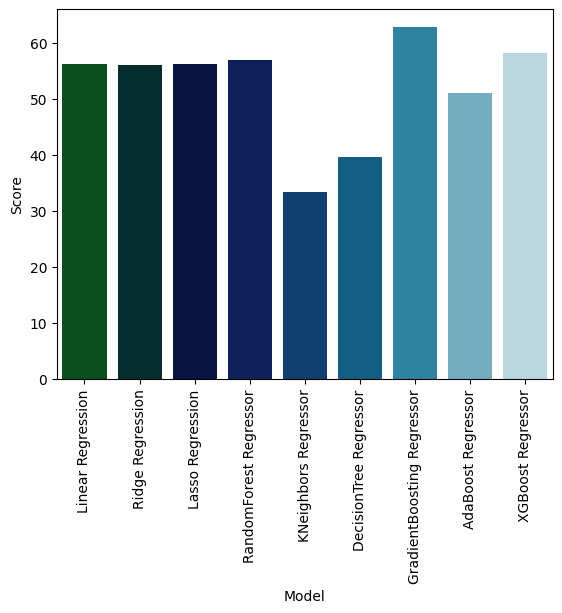

In [360]:
# plotting R2_score of each model on a bar graph
sns.barplot(x=models['Model'],y=models['Score'],palette='ocean')
plt.xticks(rotation=90)
plt.show()

Hence, we can conclude that GradientBoosting Regressor is the best model.

# Generating Predictions on Test data using GradientBoosting Regressor

In [361]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(2541, 6)
(847, 6)
(3388, 6)
(3388,)


## Final model (GradientBoosting Regressor) based on Evaluation from models dataframe

In [362]:
best_model = GradientBoostingRegressor(n_estimators=80)
best_model.fit(x,y)

GradientBoostingRegressor(n_estimators=80)

## Generating Prediction on test data

In [363]:
ypred = best_model.predict(x_test)
print(ypred)

[ 91520.01159206 272867.52955409 735551.39618985 471517.51196886
 167418.60817516  87446.8557402  342767.61883005 122597.93489165
 294514.29078242 424625.85934822 180858.3456418  118467.01365743
 362860.99948013 269222.2985657  374364.75437025  87446.8557402
 471517.51196886 209689.81802553  87134.62651782 466596.82994587
 350868.88387285 235646.48319924 386946.46149684 210961.71252007
 160279.19400052 285058.11161562 352287.82474611  94734.90023022
 250547.1969281  779781.22734198 314199.73581451 215316.25457932
 672809.67765441 379032.57287526 309006.51501157 388404.39751934
 438827.57703967 672809.67765441 130894.50243601 364958.88907997
 534865.26855731 309006.51501157 160279.19400052 487417.4051145
 464891.62120214 425584.60699919 197031.64804516 159554.65147183
 204496.5972226  241313.49306083 281769.82121108 600492.27293887
 292374.37151354  88472.55100757 347629.16789435 314199.73581451
  88472.55100757 471517.51196886 296751.68157828 487417.4051145
  78527.25242268 480358.7124

# Save the Model

In [364]:
import pickle

In [365]:
pickle.dump(best_model, open('model.pkl', 'wb')) # wb = write binary
pickle.dump(car, open('dataset.pkl', 'wb')) # wb = write binary

# Load the Model

In [366]:
loaded_model = pickle.load(open('model.pkl', 'rb'))  # rb = read binary
loaded_model.predict(x_test)

array([ 91520.01159206, 272867.52955409, 735551.39618985, 471517.51196886,
       167418.60817516,  87446.8557402 , 342767.61883005, 122597.93489165,
       294514.29078242, 424625.85934822, 180858.3456418 , 118467.01365743,
       362860.99948013, 269222.2985657 , 374364.75437025,  87446.8557402 ,
       471517.51196886, 209689.81802553,  87134.62651782, 466596.82994587,
       350868.88387285, 235646.48319924, 386946.46149684, 210961.71252007,
       160279.19400052, 285058.11161562, 352287.82474611,  94734.90023022,
       250547.1969281 , 779781.22734198, 314199.73581451, 215316.25457932,
       672809.67765441, 379032.57287526, 309006.51501157, 388404.39751934,
       438827.57703967, 672809.67765441, 130894.50243601, 364958.88907997,
       534865.26855731, 309006.51501157, 160279.19400052, 487417.4051145 ,
       464891.62120214, 425584.60699919, 197031.64804516, 159554.65147183,
       204496.5972226 , 241313.49306083, 281769.82121108, 600492.27293887,
       292374.37151354,  

# Creating a Random Dataset and Applying the saved model to predict the target column for the new dataframe.

Taking sample of Random 20 Points from the CAR_DETAILS Dataset

In [367]:
random = car.sample(20)
random_df = random.drop('selling_price',axis=1)
random_df

,name,year,km_driven,fuel,seller_type,transmission,owner,brand
3816,Mahindra Quanto C6,2014,89126,1,1,1,0,Mahindra
327,Maruti Swift Dzire VDI,2018,25000,1,1,1,0,Maruti
2098,Hyundai Getz GLX,2005,90000,4,1,1,4,Hyundai
60,Maruti Alto LXi,2012,60000,4,1,1,2,Maruti
3718,Toyota Innova 2.5 GX 8 STR BSIV,2009,347089,1,0,1,0,Toyota
4077,Mahindra Scorpio EX,2013,110000,1,1,1,0,Mahindra
978,Hyundai EON Magna Plus,2014,42000,4,1,1,0,Hyundai
3366,Tata Indigo GLS,2008,120000,4,1,1,0,Tata
3545,Hyundai Elite i20 Sportz Plus BSIV,2019,10000,4,1,1,0,Hyundai
698,Volkswagen Jetta 1.9 L TDI,2010,100000,1,0,1,0,Volkswagen


In [368]:
# Conversion of random_df to csv file.
random_df.to_csv('data_sample')

In [369]:
# Loading car_sample dataset
sample_data = pd.read_csv('/content/data_sample')
sample_data

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
0,3816,Mahindra Quanto C6,2014,89126,1,1,1,0,Mahindra
1,327,Maruti Swift Dzire VDI,2018,25000,1,1,1,0,Maruti
2,2098,Hyundai Getz GLX,2005,90000,4,1,1,4,Hyundai
3,60,Maruti Alto LXi,2012,60000,4,1,1,2,Maruti
4,3718,Toyota Innova 2.5 GX 8 STR BSIV,2009,347089,1,0,1,0,Toyota
5,4077,Mahindra Scorpio EX,2013,110000,1,1,1,0,Mahindra
6,978,Hyundai EON Magna Plus,2014,42000,4,1,1,0,Hyundai
7,3366,Tata Indigo GLS,2008,120000,4,1,1,0,Tata
8,3545,Hyundai Elite i20 Sportz Plus BSIV,2019,10000,4,1,1,0,Hyundai
9,698,Volkswagen Jetta 1.9 L TDI,2010,100000,1,0,1,0,Volkswagen


In [370]:
# showing first 5 rows
sample_data.head()

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
0,3816,Mahindra Quanto C6,2014,89126,1,1,1,0,Mahindra
1,327,Maruti Swift Dzire VDI,2018,25000,1,1,1,0,Maruti
2,2098,Hyundai Getz GLX,2005,90000,4,1,1,4,Hyundai
3,60,Maruti Alto LXi,2012,60000,4,1,1,2,Maruti
4,3718,Toyota Innova 2.5 GX 8 STR BSIV,2009,347089,1,0,1,0,Toyota


In [371]:
# showing last 5 rows
sample_data.tail()

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
15,1388,Hyundai i20 Active 1.2 S,2017,35000,4,1,1,0,Hyundai
16,777,Hyundai Verna 1.6 VTVT AT S Option,2016,10000,4,1,0,0,Hyundai
17,3652,Maruti 800 AC,2008,50000,4,1,1,2,Maruti
18,3225,Toyota Innova 2.5 GX (Diesel) 7 Seater BS IV,2010,150000,1,1,1,2,Toyota
19,3942,Honda City i DTEC SV,2014,71318,1,0,1,0,Honda


In [372]:
# showing dimension of the dataset
sample_data.shape

(20, 9)

In [373]:
# showing columns
sample_data.columns

Index(['Unnamed: 0', 'name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')

In [374]:
# Dropping unnecessary columns
sample_data = sample_data.drop(['Unnamed: 0','name','brand'],axis=1)
sample_data.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [375]:
# making prediction on sample data
predicted_selling_price = loaded_model.predict(sample_data)
print(predicted_selling_price)

[487417.4051145  779781.22734198  76574.40132617 232436.69519725
 363340.2424434  400130.90871388 314199.73581451 134666.50554918
 553982.67408354 311442.3311664  342767.61883005 851130.97830449
 529219.84082616 279306.80296234 165472.41480345 425584.60699919
 596608.73527374 126951.22645968 287312.2680589  525111.87187228]


In [376]:
#  Compare the actual data and predicted data
new_data_with_predictions = random.copy()
new_data_with_predictions["predicted_selling Price"] = predicted_selling_price

# Print the actual and predicted data
print("Actual Selling Price and Predicted Selling Price for 20 cars brands with their name are :- ")
new_data_with_predictions[["name","brand","selling_price", "predicted_selling Price"]]

Actual Selling Price and Predicted Selling Price for 20 cars brands with their name are :- 


,name,brand,selling_price,predicted_selling Price
3816,Mahindra Quanto C6,Mahindra,285000.0,487417.405114
327,Maruti Swift Dzire VDI,Maruti,800000.0,779781.227342
2098,Hyundai Getz GLX,Hyundai,70000.0,76574.401326
60,Maruti Alto LXi,Maruti,160000.0,232436.695197
3718,Toyota Innova 2.5 GX 8 STR BSIV,Toyota,420000.0,363340.242443
4077,Mahindra Scorpio EX,Mahindra,450000.0,400130.908714
978,Hyundai EON Magna Plus,Hyundai,220000.0,314199.735815
3366,Tata Indigo GLS,Tata,130000.0,134666.505549
3545,Hyundai Elite i20 Sportz Plus BSIV,Hyundai,721000.0,553982.674084
698,Volkswagen Jetta 1.9 L TDI,Volkswagen,250000.0,311442.331166
